In [8]:
# SEMANA 2: COMPRENSIÓN DE LOS DATOS (EDA)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Configuración
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline
pd.set_option('display.max_columns', None)

print("Librerías cargadas correctamente")

Librerías cargadas correctamente


In [9]:
# Cargar datos directamente desde archivos
import pandas as pd

covid_df = pd.read_parquet('../data/02_intermediate/covid_compact_validated.parquet')
vacc_df = pd.read_parquet('../data/02_intermediate/vaccination_global_validated.parquet')

print(f"✅ Datos cargados")
print(f"COVID-19: {covid_df.shape}")
print(f"Vacunación: {vacc_df.shape}")
print("\nPrimeras filas COVID:")
print(covid_df.head(2))
print("\nPrimeras filas Vacunación:")
print(vacc_df.head(2))

✅ Datos cargados
COVID-19: (521908, 61)
Vacunación: (203057, 29)

Primeras filas COVID:
       country       date  total_cases  new_cases  new_cases_smoothed  \
0  Afghanistan 2020-01-01          NaN        NaN                 NaN   
1  Afghanistan 2020-01-02          NaN        NaN                 NaN   

   total_cases_per_million  new_cases_per_million  \
0                      NaN                    NaN   
1                      NaN                    NaN   

   new_cases_smoothed_per_million  total_deaths  new_deaths  \
0                             NaN           NaN         NaN   
1                             NaN           NaN         NaN   

   new_deaths_smoothed  total_deaths_per_million  new_deaths_per_million  \
0                  NaN                       NaN                     NaN   
1                  NaN                       NaN                     NaN   

   new_deaths_smoothed_per_million  excess_mortality  \
0                              NaN               NaN   
1


MISSING VALUES - COVID-19
Columnas con missing: 59/61
Promedio missing: 53.84%

Top 10 columnas con más missing:
                                 Column  Missing_Count  Missing_Percentage
                human_development_index         521908              100.00
      weekly_icu_admissions_per_million         510915               97.89
                  weekly_icu_admissions         510915               97.89
excess_mortality_cumulative_per_million         508306               97.39
   excess_mortality_cumulative_absolute         508272               97.39
            excess_mortality_cumulative         508272               97.39
                       excess_mortality         508272               97.39
     weekly_hosp_admissions_per_million         497411               95.31
                 weekly_hosp_admissions         497411               95.31
               icu_patients_per_million         482792               92.51


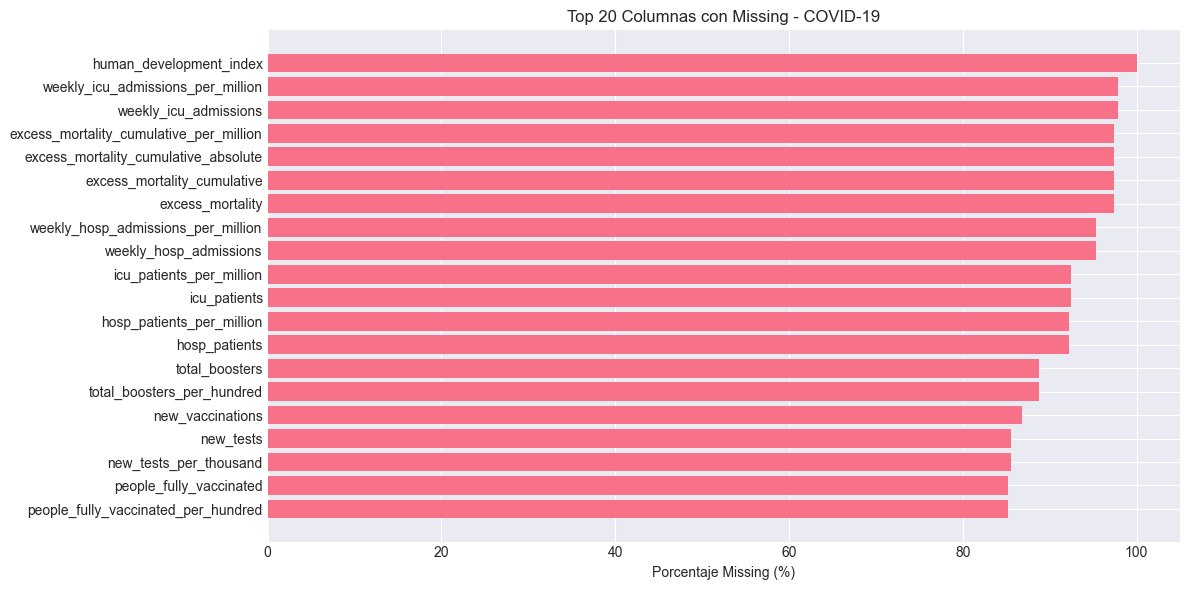


MISSING VALUES - Vacunación
Columnas con missing: 22/29
Promedio missing: 27.77%

Top 10 columnas con más missing:
                                                 Column  Missing_Count  Missing_Percentage
                                      share_of_boosters         201721               99.34
total_vaccinations_no_boosters_per_hundred_interpolated         144728               71.27
                                         total_boosters         144273               71.05
                             total_boosters_per_hundred         144273               71.05
                                     daily_vaccinations         134181               66.08
                                people_fully_vaccinated         126046               62.07
                    people_fully_vaccinated_per_hundred         126046               62.07
                          people_vaccinated_per_hundred         124046               61.09
                                      people_vaccinated         1

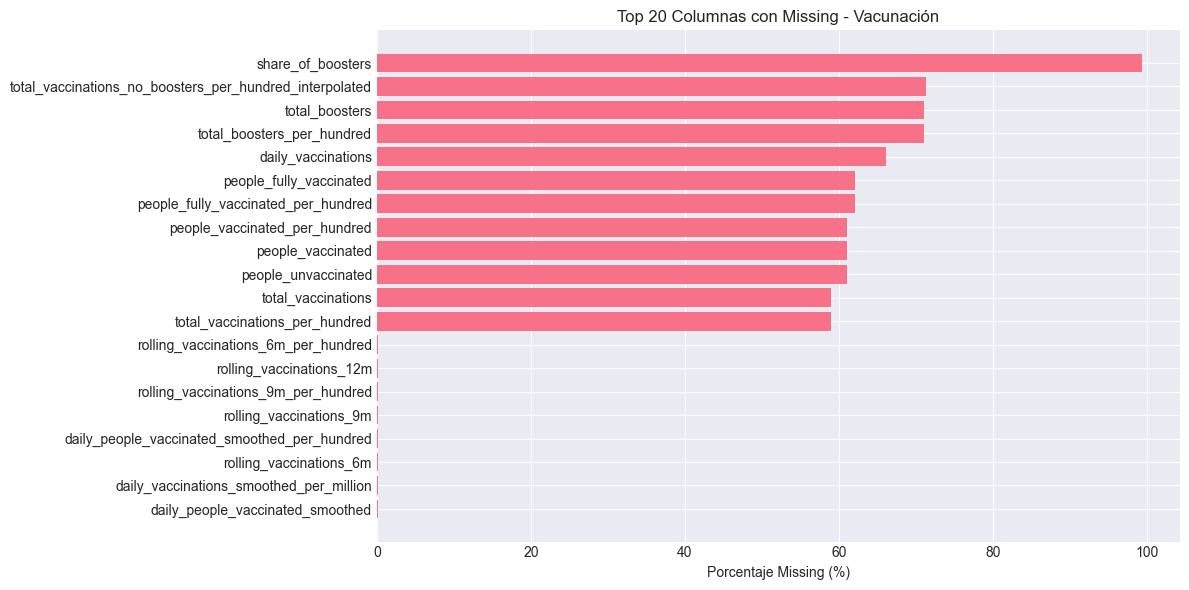

In [10]:
def analyze_missing_values(df, name):
    """Análisis de valores faltantes"""
    missing = df.isnull().sum()
    missing_pct = (missing / len(df) * 100).round(2)
    
    missing_df = pd.DataFrame({
        'Column': missing.index,
        'Missing_Count': missing.values,
        'Missing_Percentage': missing_pct.values
    })
    
    missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values(
        'Missing_Percentage', ascending=False
    )
    
    print(f"\n{'='*60}")
    print(f"MISSING VALUES - {name}")
    print(f"{'='*60}")
    print(f"Columnas con missing: {len(missing_df)}/{len(df.columns)}")
    print(f"Promedio missing: {missing_pct.mean():.2f}%\n")
    print("Top 10 columnas con más missing:")
    print(missing_df.head(10).to_string(index=False))
    
    # Gráfico
    if len(missing_df) > 0:
        plt.figure(figsize=(12, 6))
        top_20 = missing_df.head(20)
        plt.barh(range(len(top_20)), top_20['Missing_Percentage'])
        plt.yticks(range(len(top_20)), top_20['Column'])
        plt.xlabel('Porcentaje Missing (%)')
        plt.title(f'Top 20 Columnas con Missing - {name}')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
    
    return missing_df

covid_missing = analyze_missing_values(covid_df, "COVID-19")
vacc_missing = analyze_missing_values(vacc_df, "Vacunación")

In [11]:
# Agregación temporal global
temporal = covid_df.groupby('date').agg({
    'total_cases': 'sum',
    'new_cases': 'sum',
    'total_deaths': 'sum',
    'new_deaths': 'sum'
}).reset_index()

# Visualización interactiva
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Casos Totales', 'Casos Nuevos', 'Muertes Totales', 'Muertes Nuevas')
)

fig.add_trace(
    go.Scatter(x=temporal['date'], y=temporal['total_cases'], 
               mode='lines', name='Total', line=dict(color='blue')),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=temporal['date'], y=temporal['new_cases'],
               mode='lines', name='Nuevos', line=dict(color='orange')),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(x=temporal['date'], y=temporal['total_deaths'],
               mode='lines', name='Total', line=dict(color='red')),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=temporal['date'], y=temporal['new_deaths'],
               mode='lines', name='Nuevos', line=dict(color='darkred')),
    row=2, col=2
)

fig.update_layout(height=700, showlegend=False, title_text="Evolución Temporal COVID-19")
fig.show()

print("\nEstadísticas Temporales:")
print(f"Fecha inicio: {temporal['date'].min()}")
print(f"Fecha fin: {temporal['date'].max()}")
print(f"Total días: {len(temporal)}")


Estadísticas Temporales:
Fecha inicio: 2020-01-01 00:00:00
Fecha fin: 2025-12-31 00:00:00
Total días: 2066



TOP 15 PAÍSES MÁS AFECTADOS:
                                            country  total_cases  total_deaths   population  cases_per_million  deaths_per_million
                                              World  778384946.0     7098868.0 8021407128.0            97038.0               885.0
                                  World excl. China  679003185.0     6976470.0          NaN                NaN                 NaN
                  World excl. China and South Korea  644431312.0     6940536.0          NaN                NaN                 NaN
World excl. China, South Korea, Japan and Singapore  607621585.0     6863818.0          NaN                NaN                 NaN
                              High-income countries  457623226.0     3489263.0 1410108183.0           324531.0              2474.0
                                               Asia  302152401.0     1637867.0 4746327240.0            63660.0               345.0
                                             Europe  

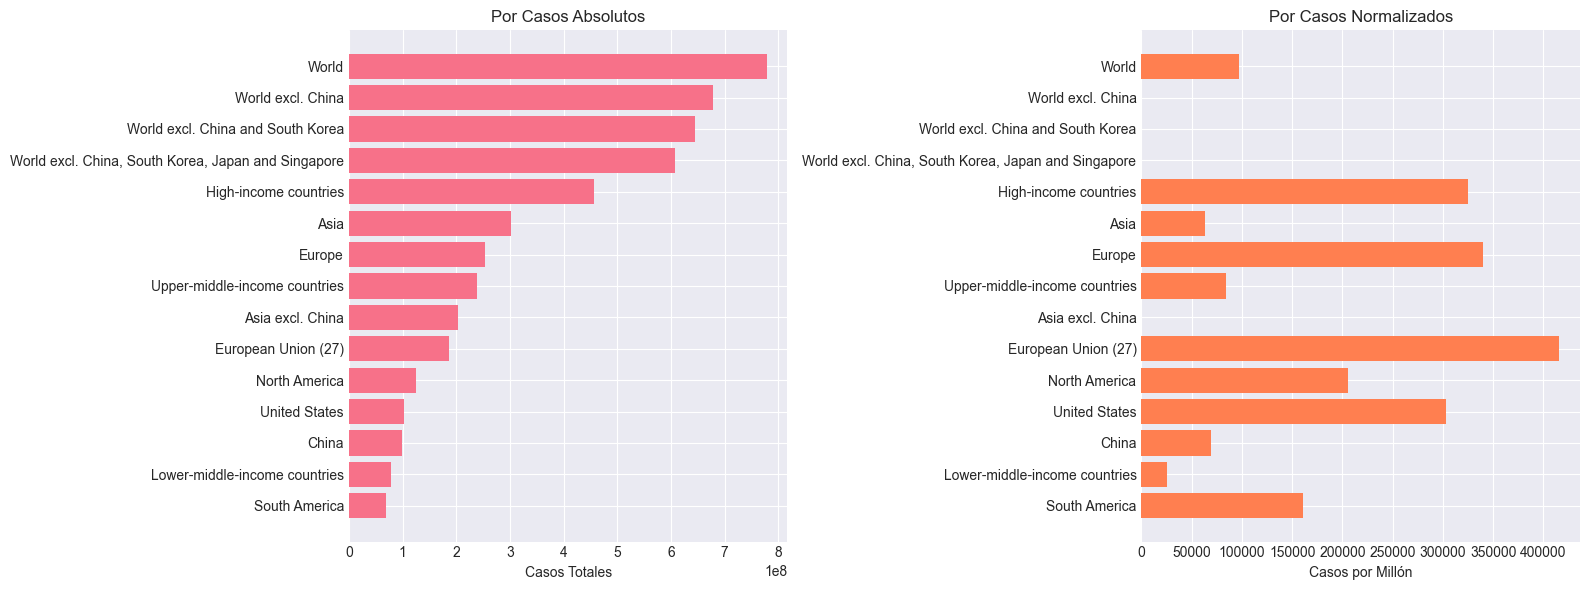

In [12]:
# Último dato por país
latest = covid_df.sort_values('date').groupby('country').last().reset_index()

# Top 15 países
top_15 = latest.nlargest(15, 'total_cases')[
    ['country', 'total_cases', 'total_deaths', 'population']
].copy()

# Normalizar por millón
top_15['cases_per_million'] = (top_15['total_cases'] / top_15['population'] * 1_000_000).round(0)
top_15['deaths_per_million'] = (top_15['total_deaths'] / top_15['population'] * 1_000_000).round(0)

print("\nTOP 15 PAÍSES MÁS AFECTADOS:")
print("="*70)
print(top_15.to_string(index=False))

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.barh(range(len(top_15)), top_15['total_cases'])
ax1.set_yticks(range(len(top_15)))
ax1.set_yticklabels(top_15['country'])
ax1.set_xlabel('Casos Totales')
ax1.set_title('Por Casos Absolutos')
ax1.invert_yaxis()

ax2.barh(range(len(top_15)), top_15['cases_per_million'], color='coral')
ax2.set_yticks(range(len(top_15)))
ax2.set_yticklabels(top_15['country'])
ax2.set_xlabel('Casos por Millón')
ax2.set_title('Por Casos Normalizados')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()


VELOCIDAD DE VACUNACIÓN - Top 10 Más Rápidos:
     country  days_to_70  max_coverage
   Gibraltar        75.0    110.308593
       China        97.0     90.127565
Cook Islands        98.0    100.149599
     Ireland       113.0     79.561860
Saudi Arabia       159.0     79.048028
     Uruguay       165.0     85.617909
      Jersey       168.0     79.155872
        Cuba       178.0     90.902941
 Isle of Man       187.0     79.799746
       Qatar       189.0     98.608742


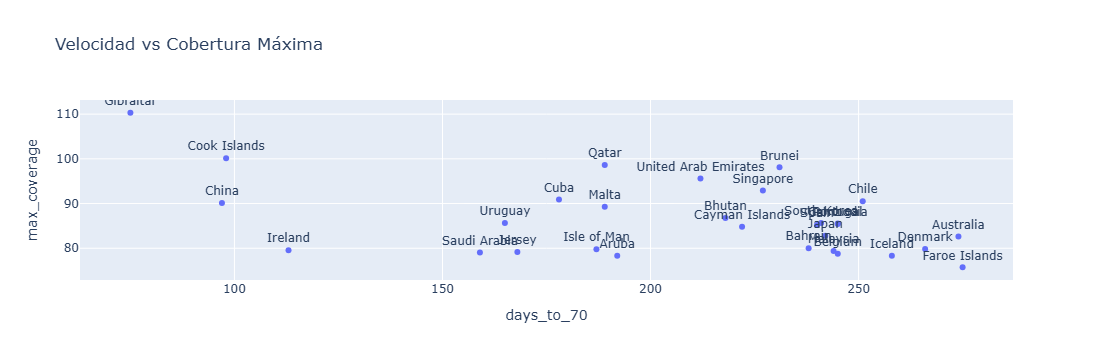

In [13]:
# Calcular días a 70% por país
def calculate_days_to_70(country_data):
    vacc_start = country_data[country_data['people_vaccinated_per_hundred'] > 0]['date'].min()
    reached_70 = country_data[country_data['people_fully_vaccinated_per_hundred'] >= 70]['date'].min()
    
    if pd.notna(vacc_start) and pd.notna(reached_70):
        return (reached_70 - vacc_start).days
    return np.nan

results = []
for country in vacc_df['country'].unique():
    country_data = vacc_df[vacc_df['country'] == country].sort_values('date')
    days = calculate_days_to_70(country_data)
    max_cov = country_data['people_fully_vaccinated_per_hundred'].max()
    
    results.append({
        'country': country,
        'days_to_70': days,
        'max_coverage': max_cov
    })

speed_df = pd.DataFrame(results)
achieved_70 = speed_df.dropna(subset=['days_to_70']).sort_values('days_to_70')

print("\nVELOCIDAD DE VACUNACIÓN - Top 10 Más Rápidos:")
print("="*60)
print(achieved_70.head(10).to_string(index=False))

# Gráfico
fig = px.scatter(
    achieved_70.head(30),
    x='days_to_70',
    y='max_coverage',
    text='country',
    title='Velocidad vs Cobertura Máxima'
)
fig.update_traces(textposition='top center')
fig.show()

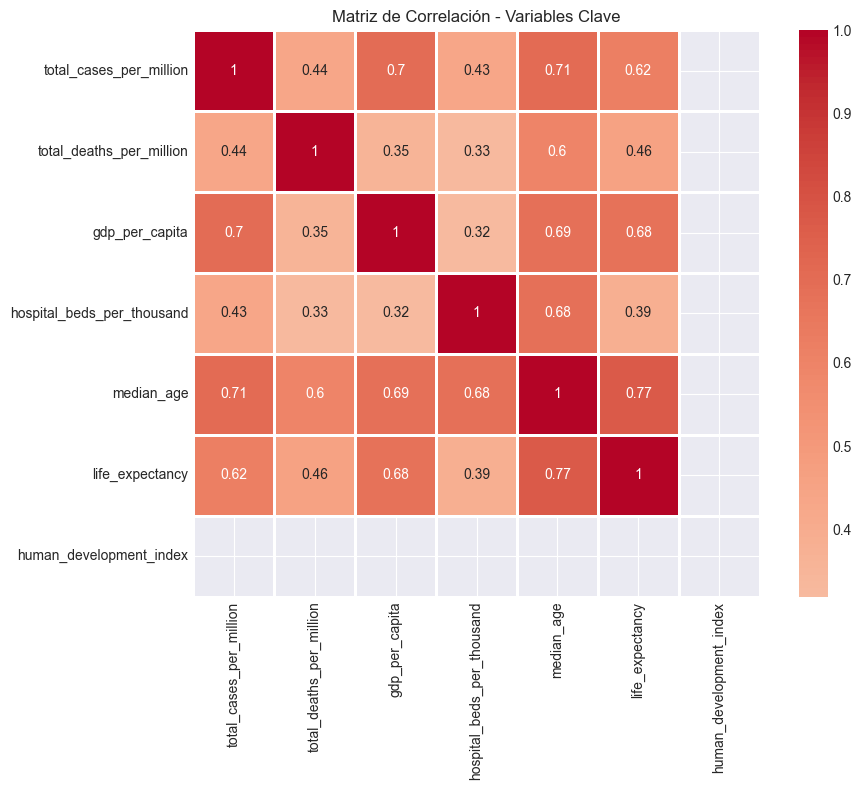


CORRELACIONES CON MORTALIDAD:
total_deaths_per_million      1.000000
median_age                    0.599690
life_expectancy               0.455532
total_cases_per_million       0.437777
gdp_per_capita                0.354828
hospital_beds_per_thousand    0.326842
human_development_index            NaN
Name: total_deaths_per_million, dtype: float64


In [14]:
# Variables clave para correlación
key_vars = [
    'total_cases_per_million',
    'total_deaths_per_million',
    'gdp_per_capita',
    'hospital_beds_per_thousand',
    'median_age',
    'life_expectancy',
    'human_development_index'
]

# Filtrar variables disponibles
latest_covid = covid_df.sort_values('date').groupby('country').last().reset_index()
available = [v for v in key_vars if v in latest_covid.columns]

# Matriz de correlación
corr_matrix = latest_covid[available].corr()

# Visualización
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1)
plt.title('Matriz de Correlación - Variables Clave')
plt.tight_layout()
plt.show()

# Correlaciones con mortalidad
if 'total_deaths_per_million' in available:
    print("\nCORRELACIONES CON MORTALIDAD:")
    print(corr_matrix['total_deaths_per_million'].sort_values(ascending=False))

In [15]:
# TARGET 1: Regresión (días a 70%)
target_regression = achieved_70[['country', 'days_to_70']].copy()

# TARGET 2: Clasificación (nivel de riesgo)
preparedness = []
for _, row in latest_covid.iterrows():
    score = 0
    
    if pd.notna(row.get('hospital_beds_per_thousand')):
        score += min(row['hospital_beds_per_thousand'] / 10, 1) * 33
    if pd.notna(row.get('gdp_per_capita')):
        score += min(row['gdp_per_capita'] / 50000, 1) * 33
    if pd.notna(row.get('human_development_index')):
        score += row['human_development_index'] * 34
    
    if score < 33:
        level = 'Alto_Riesgo'
    elif score < 67:
        level = 'Riesgo_Medio'
    else:
        level = 'Bajo_Riesgo'
    
    preparedness.append({
        'country': row['country'],
        'score': score,
        'level': level
    })

target_classification = pd.DataFrame(preparedness)

print("\nVARIABLES TARGET CREADAS")
print("="*60)
print(f"\n1. REGRESIÓN - Días a 70%:")
print(f"   Países: {len(target_regression)}")
print(f"   Media: {target_regression['days_to_70'].mean():.1f} días")
print(f"   Mediana: {target_regression['days_to_70'].median():.1f} días")

print(f"\n2. CLASIFICACIÓN - Nivel de Riesgo:")
print(target_classification['level'].value_counts())


VARIABLES TARGET CREADAS

1. REGRESIÓN - Días a 70%:
   Países: 76
   Media: 337.6 días
   Mediana: 321.0 días

2. CLASIFICACIÓN - Nivel de Riesgo:
level
Alto_Riesgo     204
Riesgo_Medio     58
Name: count, dtype: int64


In [16]:
print("\n" + "="*70)
print("RESUMEN EJECUTIVO - EDA")
print("="*70)

summary = f"""
DATOS ANALIZADOS:
  - COVID: {len(covid_df):,} registros, {covid_df['country'].nunique()} países
  - Vacunación: {len(vacc_df):,} registros, {vacc_df['country'].nunique()} países

CALIDAD DE DATOS:
  - Missing COVID: {covid_df.isnull().sum().sum() / covid_df.size * 100:.1f}%
  - Missing Vacunación: {vacc_df.isnull().sum().sum() / vacc_df.size * 100:.1f}%

TARGETS IDENTIFICADOS:
  - Regresión: {len(target_regression)} países con datos completos
  - Clasificación: 
      Alto Riesgo: {(target_classification['level']=='Alto_Riesgo').sum()}
      Riesgo Medio: {(target_classification['level']=='Riesgo_Medio').sum()}
      Bajo Riesgo: {(target_classification['level']=='Bajo_Riesgo').sum()}

HALLAZGOS CLAVE:
  - Alto % de missing requiere imputación estratégica
  - Grandes diferencias en velocidad de vacunación entre países
  - Variables socioeconómicas correlacionan con outcomes

PRÓXIMOS PASOS:
  - Semana 3: Limpieza y preparación de datos
  - Feature engineering
  - Integración de datasets
"""

print(summary)


RESUMEN EJECUTIVO - EDA

DATOS ANALIZADOS:
  - COVID: 521,908 registros, 262 países
  - Vacunación: 203,057 registros, 229 países

CALIDAD DE DATOS:
  - Missing COVID: 53.8%
  - Missing Vacunación: 27.8%

TARGETS IDENTIFICADOS:
  - Regresión: 76 países con datos completos
  - Clasificación: 
      Alto Riesgo: 204
      Riesgo Medio: 58
      Bajo Riesgo: 0

HALLAZGOS CLAVE:
  - Alto % de missing requiere imputación estratégica
  - Grandes diferencias en velocidad de vacunación entre países
  - Variables socioeconómicas correlacionan con outcomes

PRÓXIMOS PASOS:
  - Semana 3: Limpieza y preparación de datos
  - Feature engineering
  - Integración de datasets

